In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from imports import *
from datetime import datetime, timedelta
import staircase as sc
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [16]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
df.sort_values(by=['enter','leave'],inplace=True)

vsteps = Steps.read_dataframe(df,'enter','leave')
#queue = sc.Stairs(use_dates=True).layer(df.enter, df.leave)


In [17]:
df_vsteps = vsteps.to_dataframe(mode='aggregate')
df_vsteps.head(20)

,start,value
0,NaT,10
1,2020-01-01 04:40:00,-1
2,2020-01-01 09:35:00,1
3,2020-01-01 11:47:00,-1
4,2020-01-01 17:29:00,1
5,2020-01-01 20:47:00,1
6,2020-01-01 21:23:00,1
7,2020-01-01 22:18:00,-1
8,2020-01-01 22:39:00,-1
9,2020-01-02 00:53:00,1


In [18]:
vsteps_df = Steps.read_dataframe(df_vsteps,'start',weight='value')

<AxesSubplot:>

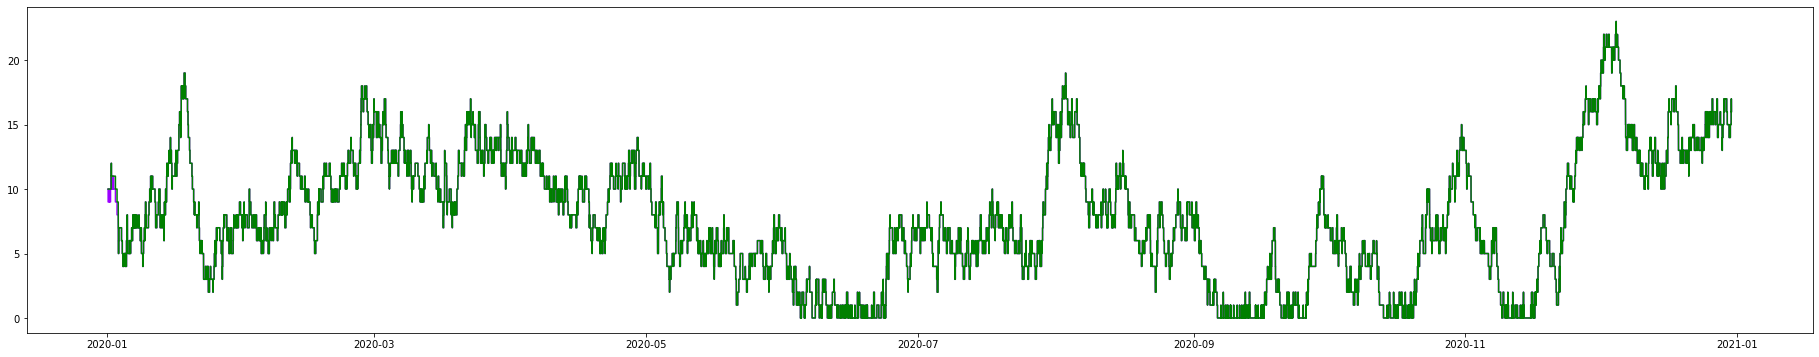

In [19]:
ax = vsteps_df.plot(size=(32,6))
vsteps.plot(ax=ax,color='g')

In [ ]:
#tbase = Basis(Basis.tanh,52416)

p = np.arange(pd.Timestamp(2020,1,31), pd.Timestamp(2020,2,4), pd.Timedelta(minutes=1)).astype(pd.Timestamp)
#px = [x.timestamp() for x in p]
fig,ax = plt.subplots(nrows=4,figsize=(20,12))

#vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,3)).plot(ax=ax[0])
v_ul_clip = vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,2,10))
v_ul_clip.plot(ax=ax[0])
(v_ul_clip>=8).plot(ax=ax[0],color='blue')
# v_ul_clip.smooth_plot(ax=ax[0],color='g')
#v_ul_clip.smooth_plot(ax=ax[0],color='g')
#(v_ul_clip).smooth_plot(ax=ax[0],color='r')

#first_step_full = (vsteps.steps())[0]
#(v_ul_clip.steps())[0].plot(ax=ax[0],color='blue')
#ax[0].step(p,first_step(p),color='blue')
#ax[0].step(p,(v_ul_clip<<timedelta(minutes=660))(p),color='g')

#queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).plot(ax[0])

queue.clip(upper=pd.Timestamp(2020,1,12)).plot(ax[1])
vsteps.clip(ubound=pd.Timestamp(2020,1,12)).plot(ax=ax[1])


vsteps.clip(lbound=pd.Timestamp(2020,2,1)).plot(ax=ax[2])
queue.clip(lower=pd.Timestamp(2020,2,1)).plot(ax[2])

vsteps.plot(ax=ax[3])
#(vsteps).smooth_plot(ax=ax[3],color='r')
#(vsteps>>pd.Timedelta(hours=11)).plot(method='function',ax=ax[3],color='g')
((vsteps>10)).plot(ax=ax[3],color='g')
#+Step(weight=10,use_datetime=True)
#print((v_ul_clip<<timedelta(minutes=660))(datetime(2020,2,1,6,0)))
#ax[2].step(np.arange(len(vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])),vsteps[pd.Timestamp(2020,1,1):pd.Timestamp(2020,1,2):pd.Timedelta(minutes=10)])

# print(queue.clip(lower=pd.Timestamp(2020,2,1),upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(lbound=pd.Timestamp(2020,2,1),ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(upper=pd.Timestamp(2020,3,1)).mean())
# print((vsteps.clip(ubound=pd.Timestamp(2020,3,1))).mean())

# print(queue.clip(lower=pd.Timestamp(2020,2,1)).mean())
# print(vsteps.clip(lbound=pd.Timestamp(2020,2,1)).mean())
